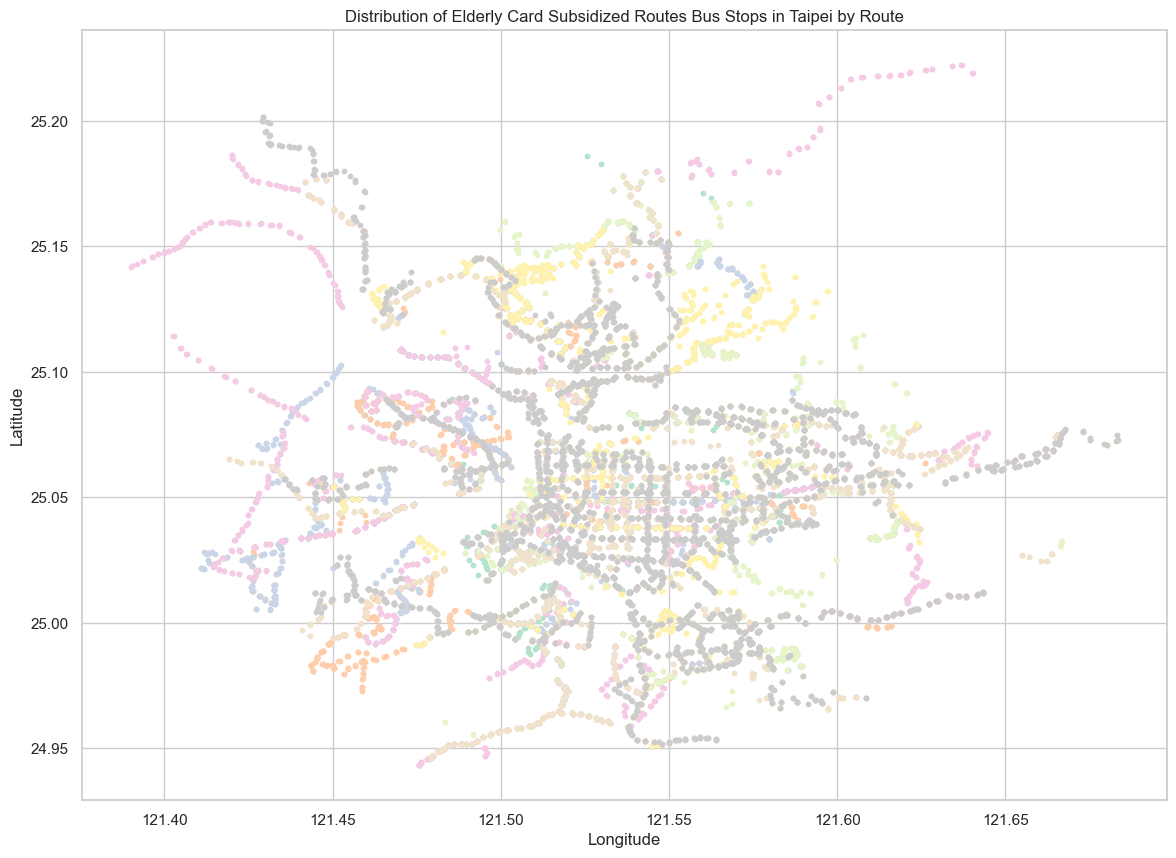

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set Seaborn style with white background
sns.set(style="whitegrid")

# Reload your data (ensure the paths are correct)
get_route_df = pd.read_csv('data/GetRoute_csv.csv')
get_stop_df = pd.read_csv('data/GetStop_csv.csv')

# Ensure 'Id' column is integer for proper matching
get_route_df['Id'] = get_route_df['Id'].astype(int)
get_stop_df['Route Id'] = get_stop_df['Route Id'].astype(int)

# Mapping of route IDs to names
route_id_to_name_mapping = get_route_df.set_index('Id')['Name'].to_dict()

# Generate a colormap with as many colors as there are routes
num_routes = len(route_id_to_name_mapping)
colors = plt.cm.get_cmap('Pastel2', num_routes)

# Now, we plot each route with a different color
plt.figure(figsize=(14, 10))

# Due to large number of routes, we'll only add a legend for the first 10 to keep the plot readable
for idx, (route_id, route_name) in enumerate(route_id_to_name_mapping.items()):
    # Filter stops for the current route
    route_stops = get_stop_df[get_stop_df['Route Id'] == route_id]
    # Plot stops with the route-specific color
    plt.scatter(route_stops['Longitude'], route_stops['Latitude'], s=10, color=colors(idx), label=route_name if idx < 10 else "")

plt.title('Distribution of Elderly Card Subsidized Routes Bus Stops in Taipei by Route')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import contextily as ctx

# Load the data from CSV files
get_route_df = pd.read_csv('data/GetRoute_csv.csv')
get_stop_df = pd.read_csv('data/GetStop_csv.csv')

# Ensure 'Id' column is integer for proper matching
get_route_df['Id'] = get_route_df['Id'].astype(int)
get_stop_df['Route Id'] = get_stop_df['Route Id'].astype(int)

# Convert the stop data to a GeoDataFrame
gdf = gpd.GeoDataFrame(get_stop_df, geometry=gpd.points_from_xy(get_stop_df['Longitude'], get_stop_df['Latitude']))

# Set the coordinate reference system (CRS) to WGS84 (epsg:4326) and then to Web Mercator (epsg:3857)
gdf.crs = 'epsg:4326'
gdf = gdf.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(14, 10))
gdf.plot(ax=ax, color='blue', markersize=5)

# Add a basemap for Taipei street view
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)  # You can change the basemap source as needed

# Set axis labels and title
ax.set_title('Bus Stops in Taipei')
ax.set_axis_off()

plt.show()


ModuleNotFoundError: No module named 'contextily'

   ---------------------------------------- 2.1/2.1 MB 2.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.3.1
    Uninstalling pip-23.3.1:
      Successfully uninstalled pip-23.3.1
  Rolling back uninstall of pip
  Moving to c:\users\flora\appdata\roaming\python\python37\scripts\pip.exe
   from C:\Users\flora\AppData\Local\Temp\pip-uninstall-6j_4_d3f\pip.exe
  Moving to c:\users\flora\appdata\roaming\python\python37\scripts\pip3.11.exe
   from C:\Users\flora\AppData\Local\Temp\pip-uninstall-6j_4_d3f\pip3.11.exe
  Moving to c:\users\flora\appdata\roaming\python\python37\scripts\pip3.7.exe
   from C:\Users\flora\AppData\Local\Temp\pip-uninstall-6j_4_d3f\pip3.7.exe
  Moving to c:\users\flora\appdata\roaming\python\python37\scripts\pip3.exe
   from C:\Users\flora\AppData\Local\Temp\pip-uninstall-6j_4_d3f\pip3.exe
  Moving to c:\users\flora\appdata\roaming\python\python37\site-packages\pip-23.3.1.dist-info\
   from c:\users\flora\appdata\roaming\python\

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\flora\AppData\Roaming\Python\Python37\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
  File "C:\Users\flora\AppData\Roaming\Python\Python37\site-packages\pip\_internal\cli\req_command.py", line 245, in wrapper
    return func(self, options, args)
  File "C:\Users\flora\AppData\Roaming\Python\Python37\site-packages\pip\_internal\commands\install.py", line 460, in run
    pycompile=options.compile,
  File "C:\Users\flora\AppData\Roaming\Python\Python37\site-packages\pip\_internal\req\__init__.py", line 79, in install_given_reqs
    pycompile=pycompile,
  File "C:\Users\flora\AppData\Roaming\Python\Python37\site-packages\pip\_internal\req\req_install.py", line 855, in install
    requested=self.user_supplied,
  File "C:\Users\flora\AppData\Roaming\Python\Python37\site-packages\pip\_internal\operations\install\wheel.py", line 739, in install_wheel
    reque